In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
from google.colab import drive

from zmq.sugar.frame import Frame
drive.mount("/content/drive",force_remount=True)
import os
os.chdir('/content/drive/MyDrive/IMGS211')


Mounted at /content/drive


In [64]:
X = [10, 20, 30, 40, 50, 60, 70,  80, 90]
Y = [12, 16, 38, 35, 44, 75, 60, 77, 79]

In [65]:
dataDF = pd.DataFrame({"X": X, "Y": Y})

## Visualize

<Axes: xlabel='X', ylabel='Y'>

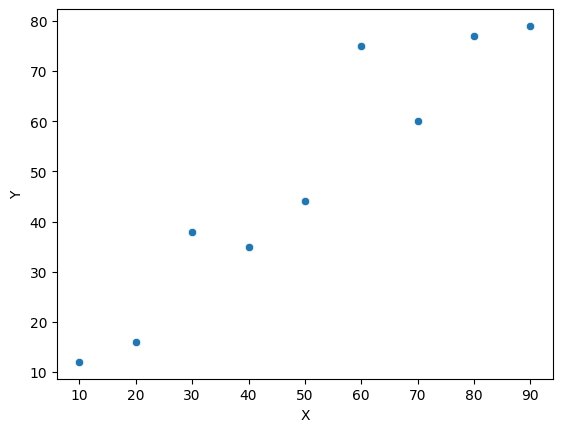

In [66]:
sns.scatterplot(dataDF, x='X', y='Y')

<Axes: xlabel='X', ylabel='Y'>

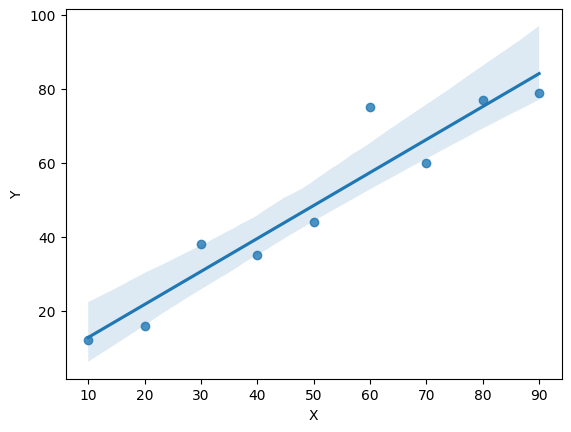

In [67]:
sns.regplot(dataDF, x='X', y='Y')

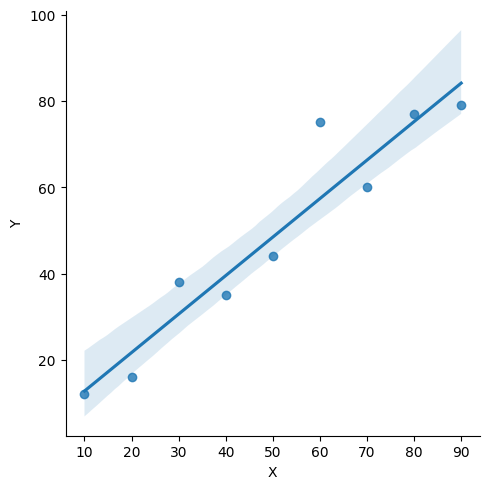

In [68]:
sns.lmplot(dataDF, x='X', y='Y')


## Regress with pingouin

In [69]:
!pip install pingouin
import pingouin as pg

In [70]:
pg.linear_regression(dataDF['X'], dataDF['Y'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.861111,6.187643,0.624004,0.552410,0.903792,0.890048,-10.770340,18.492562
1,X,0.891667,0.109957,8.109208,0.000084,0.903792,0.890048,0.631659,1.151674


### Correllation assumes that our **residuals** are normally distributed

<Axes: xlabel='X', ylabel='Y'>

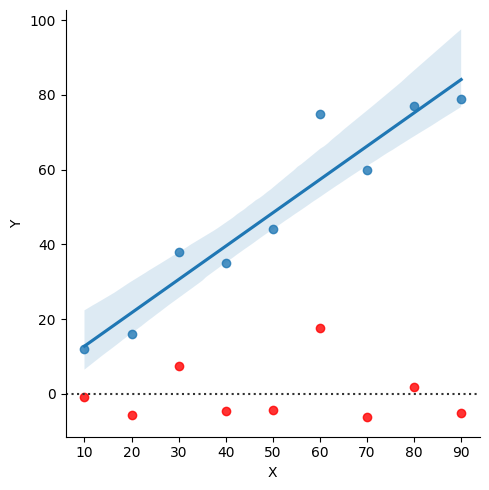

In [71]:
sns.lmplot(dataDF, x='X', y='Y')
sns.residplot(x='X', y = 'Y', data = dataDF,color='red')

## Pearson's correlation coefficient

$r_{xy} = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_i(x_i - \bar{x})^2} \sqrt{\sum_i(y_i - \bar{y})^2}}
= \frac{\text{cov}(x, y)}{\sigma_x \sigma_y}$

In [72]:
pg.corr(dataDF['X'],dataDF['Y'])

,n,r,CI95%,p-val,BF10,power
pearson,9,0.95068,"[0.78, 0.99]",0.000084,243.637,0.996316


Note that it is equal to the $\sqrt(r^2)$ presented in our regression table

In [73]:
r = pg.corr(dataDF['X'],dataDF['Y'])['r'][0]

print(f'Pearson\'s correlation coefficient is {r:.3}, and r^2 is {r**2:.3}')

Pearson's correlation coefficient is 0.951, and r^2 is 0.904


In [74]:
r2 = pg.linear_regression(dataDF['X'], dataDF['Y'])['r2'][0]

print(f'The r^2 returned by linear_regression() was {r2:.3f}')
print(f'It is equal to the square of the pearsons correlation coefficient returned by pg.corr: {r:.3f}^2')

The r^2 returned by linear_regression() was 0.904
It is equal to the square of the pearsons correlation coefficient returned by pg.corr: 0.951^2


# What if the data is non-linear?
[Note: This section borrows heavily from https://seaborn.pydata.org/tutorial/regression.html ]

In [75]:
anscombe = sns.load_dataset("anscombe")
df2 = anscombe.query("dataset == 'II'")
df2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


#. A linear fit just won't cut it!  

Unfortunately, Pingouin's regression methods aren't that sophisticated yet, and so we have to turn to statsmodels for a regression that is more complicated than linear.

https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/#

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

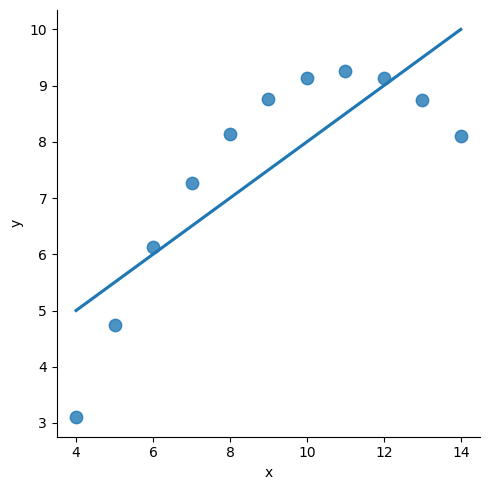

In [77]:
sns.lmplot(x="x", y="y", data=df2,
           ci=None, scatter_kws={"s": 80});

### Let's fit a second-order polynomial

First, with seaborn.  At this point, visual only. I don't know that it returns the equations etc you need for a proper statistical test...

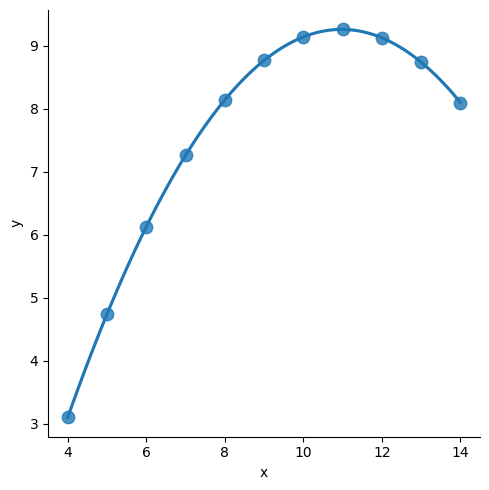

In [100]:
sns.lmplot(x="x", y="y", data=df2,order=2, ci=None, scatter_kws={"s": 80});

Now, with statsmodels

In [79]:
from matplotlib import pyplot as plt

First, a linear model

Y = 0.50 X+ 3.00


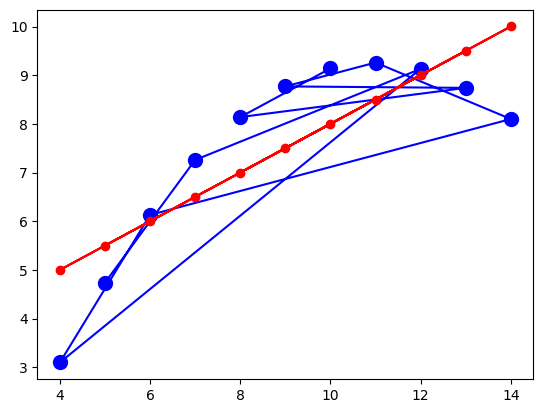

In [80]:
modelFit = smf.ols(data = df2, formula='y~x').fit() # Predict variable Y as a function of X.
print(f'Y = {modelFit.params[1]:.2f} X+ {modelFit.params[0]:.2f}')

ypred = modelFit.predict(df2['x'])

plt.plot(df2['x'],df2['y'],'.-b',ms=20,label='data')
plt.plot(df2['x'],ypred,'o-r',label='model')

## Oops!  

That looks like chaos because the x values are not stored in ascending order.  Easy enough to fix by sorting.

Y = 0.50 X+ 3.00


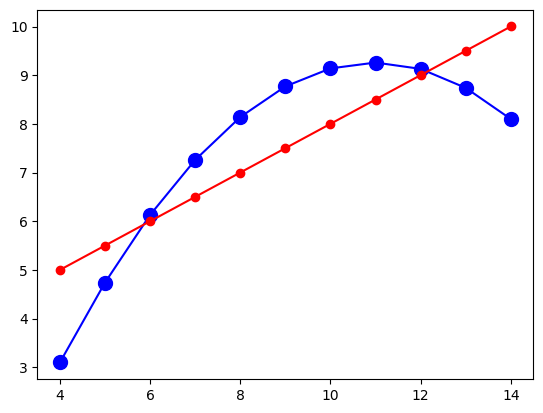

In [81]:
df2_sorted = df2.sort_values('x').reset_index()

modelFit = smf.ols(data = df2, formula='y~x').fit() # Predict variable Y as a function of X.
print(f'Y = {modelFit.params[1]:.2f} X+ {modelFit.params[0]:.2f}')

# Now, with df2_sorted
ypred = modelFit.predict(df2_sorted['x'])

plt.plot(df2_sorted['x'],df2_sorted['y'],'.-b',ms=20,label='data')
plt.plot(df2_sorted['x'],ypred,'o-r',label='model')

## Polynomial

In [82]:
modelFit = smf.ols(data = df2, formula='y~x+I(x**2)').fit() # Predict variable Y as a function of X.
print(f'Y = {modelFit.params[1]:.2f} X+ {modelFit.params[0]:.2f}')

# ypred = modelFit.predict(df2_sorted['x'])

new_x = np.linspace(4,14,100)
new_y = modelFit.predict(new_x)
plt.plot(df2_sorted['x'],df2_sorted['y'],'.b',ms=20,label='data')
plt.plot(df2_sorted['x'],ypred,'o-r',label='model')
plt.plot(new_x, new_y,'o-c',label='model')

Y = 2.78 X+ -6.00


Custom TB Handler failed, unregistering


## What about when there is variability in the data?

In [88]:
import scipy.stats as stats
# import scipy as sp
# import statsmodels.formula.api as sfa  # For ordinary Least Squares
# import statsmodels.stats.anova as ssa  # For ANOVA linear models

nPts = 300
np.random.seed(123)
s_n = 5000

a3, a2, a1, a0 = 25, 0, 30, 5
mu_n = 0

X = np.linspace(0, 10, nPts)
noise = stats.norm(mu_n, s_n)
Y = a3*X**3 + a2*X**2 + a1*X + a0 + noise.rvs(nPts)

a2 = pd.DataFrame({'x':X,'y':Y})
a2.head()

,x,y
0,0.000000,-5423.153017
1,0.033445,4992.731513
2,0.066890,1421.906661
3,0.100334,-7523.438284
4,0.133779,-2883.928026


In [93]:
# Fit model
res = smf.ols('y~x+I(x**2)', a2).fit()

# Calculate confidence intervals for an alpha of 0.05
alpha = 0.05
sum_frame = res.get_prediction(a2).summary_frame(alpha)
sum_frame.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1327.809691,892.167572,-427.961393,3083.580775,-9026.738652,11682.358034
1,1281.992022,880.312414,-450.448305,3014.432349,-9068.625775,11632.609819
2,1236.969077,868.578231,-472.378572,2946.316725,-9109.808618,11583.746772
3,1192.740854,856.965865,-493.753850,2879.235558,-9150.285960,11535.767668
4,1149.307355,845.476180,-514.575838,2813.190548,-9190.056579,11488.671289


In [96]:
X = a2['x']
Y = a2['y']

# Calculate confidence intervals on the mean
mean_ci_lower = sum_frame.mean_ci_lower
mean_ci_upper = sum_frame.mean_ci_upper

# Calculate confidence intervals on the data
data_ci_lower = sum_frame.obs_ci_lower
data_ci_upper = sum_frame.obs_ci_upper

# Calculate r^2
rSq = res.rsquared
rSqa = res.rsquared_adj

## Plot

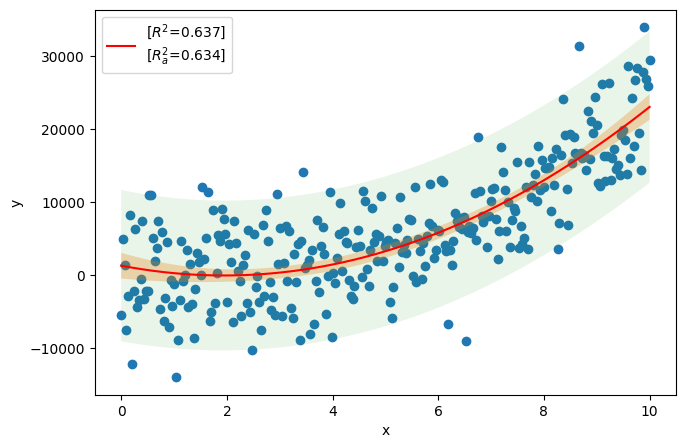

In [97]:

plt.figure(figsize=(7.5,5))
plt.scatter(X,Y)
plt.plot(X, res.fittedvalues, '-r', label=f'[$R^2$={rSq:0.3f}]\n[$R^2_a$={rSqa:0.3f}]')

plt.fill_between(X, mean_ci_lower, mean_ci_upper,alpha=0.3)
plt.fill_between(X, data_ci_lower, data_ci_upper,alpha=0.1)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# What about exploring the relationship between multiple variables?

In [83]:

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30

u = np.random.normal(5.5, 1, 30)
v = np.random.normal(5.5, 1, 30)
w, x = np.random.multivariate_normal(mean, cov, n).T
y, z = np.random.multivariate_normal(mean, cov, n).T


data = pd.DataFrame({'U':u, 'V':v, 'W':w, 'X': x, 'Y': y, 'Z': z})
data.head(10)

,U,V,W,X,Y,Z
0,4.414369,5.244381,4.335658,6.046605,4.493581,4.999760
1,6.497345,2.701411,4.312031,4.125783,3.557388,5.226612
2,5.782978,3.728467,2.371322,4.093336,2.681995,3.440291
3,3.993705,4.800123,4.063554,4.855070,3.049929,4.496910
4,4.921400,6.427462,4.982563,6.161023,3.827925,4.323536
5,7.151437,5.326364,3.952719,4.209312,5.383986,5.400077
6,3.073321,5.502846,3.451177,3.469809,4.532715,5.820441
7,5.071087,6.188223,5.433979,7.363939,3.174727,4.464046
8,6.765936,4.620464,4.417144,5.304419,3.683346,6.298655
9,4.633260,5.783627,5.467306,5.030889,2.799799,3.483172


# Pairwise correlation

In [84]:
pg.pairwise_corr(data, columns=data.columns, method='pearson', padjust='sidak')

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,BF10,power
0,U,V,pearson,two-sided,30,-0.132301,"[-0.47, 0.24]",0.485850,0.999954,sidak,0.286,0.107471
1,U,W,pearson,two-sided,30,0.028179,"[-0.34, 0.38]",0.882489,1.000000,sidak,0.229,0.052018
2,U,X,pearson,two-sided,30,0.197078,"[-0.18, 0.52]",0.296553,0.994889,sidak,0.382,0.182916
3,U,Y,pearson,two-sided,30,0.262250,"[-0.11, 0.57]",0.161510,0.928802,sidak,0.579,0.293032
4,U,Z,pearson,two-sided,30,0.063816,"[-0.3, 0.41]",0.737607,1.000000,sidak,0.239,0.062574
5,V,W,pearson,two-sided,30,0.206497,"[-0.17, 0.53]",0.273595,0.991727,sidak,0.402,0.196724
6,V,X,pearson,two-sided,30,0.301417,"[-0.07, 0.6]",0.105517,0.812249,sidak,0.793,0.374274
7,V,Y,pearson,two-sided,30,0.274490,"[-0.1, 0.58]",0.142124,0.899684,sidak,0.635,0.317332
8,V,Z,pearson,two-sided,30,0.040419,"[-0.32, 0.39]",0.832058,1.000000,sidak,0.232,0.054705
9,W,X,pearson,two-sided,30,0.524472,"[0.2, 0.74]",0.002928,0.043027,sidak,15.466,0.866353


# How about a visualization of the correlation matrix/

From: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

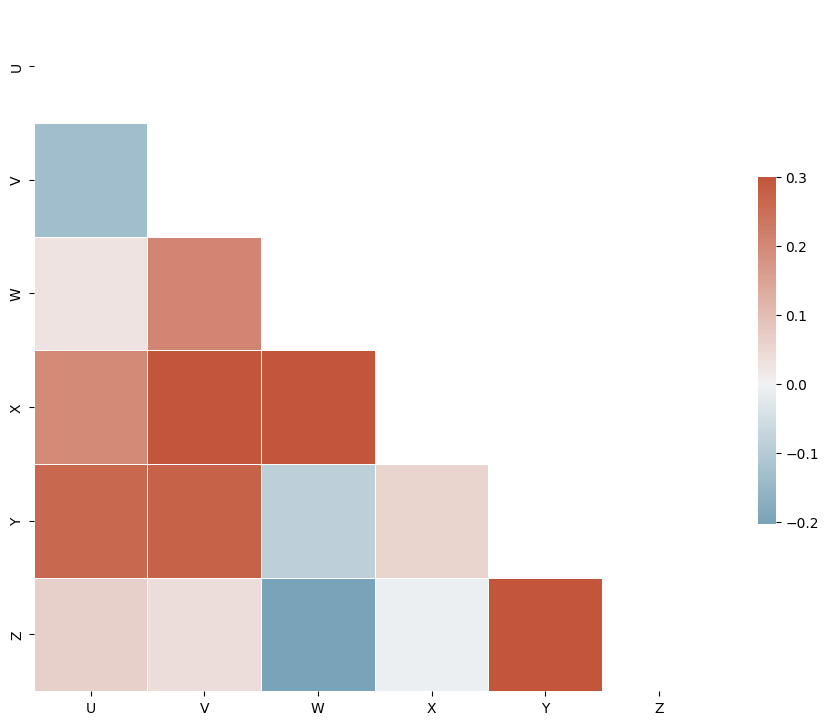

In [85]:
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})